In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from matplotlib import pyplot as plt
import numpy as np
from skimage.external.tifffile import imread
from skimage import io
import os
from os.path import join as oj
import data
from sklearn.linear_model import LinearRegression, LogisticRegression, RidgeCV
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_validate, train_test_split
import imageio

X, Y = data.get_data(normalize=False)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
X_max = X.max(axis=0)
X_max_signal = np.where(X_max > 5000)
ymax_patch = []
xmax_pixel = []
for i in range(len(X_max_signal[0])):
    i1 = X_max_signal[0][i]
    i2 = X_max_signal[1][i]
    ymax_patch.append(np.max(Y[:,max(0,(i1-5)):(i1+5),:][:,:,(i2-5):(i2+5)]))
    xmax_pixel.append(np.max(X[:100,i1,i2]))
    
ymax_order = np.argsort(ymax_patch)

## make gifs for patches w/o events

In [ ]:
for k in range(10):
    i = ymax_order[k]
    i1 = X_max_signal[0][i]
    i2 = X_max_signal[1][i]
    kargs = {'duration': 5}
    fname = '/abc-image-understanding/endocytosis_prediction/clips/class1_' + str(k) + '.mp4'
    imageio.mimsave(fname, 
                    X[:,max(0,(i1-10)):(i1+10),:][:,:,(i2-10):(i2+10)],
                    format='GIF',
                    duration=0.04)

In [16]:
ymax_label = (np.array(ymax_patch) > 3500)

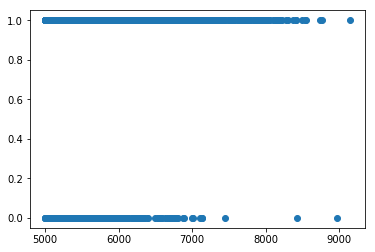

In [17]:
plt.plot(xmax_pixel, ymax_label, 'o')

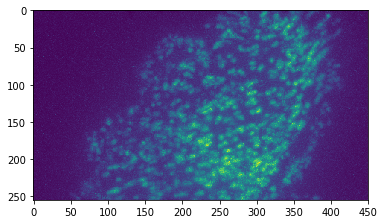

In [21]:
plt.imshow(X_max)

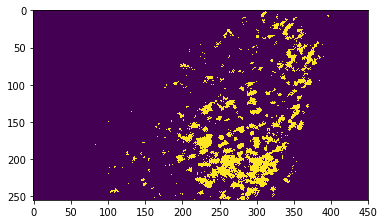

In [22]:
plt.imshow(X_max > 5000)